### Вариационный метод Монте-Карло

$$
    \left<H\right>=\frac{\int\psi^*\hat{H}\psi d\boldsymbol{r}}{\int\psi^*\psi d\boldsymbol{r}} > E_0
$$

Пробная волновая функция: $\psi_0=\cos{x}$. $x\in\left[-\frac{\pi}{2}, \frac{\pi}{2}\right]$, $\hat{H} = -\frac{1}{2}\Delta + \hat{V}$, $\hat{V}=\frac{1}{2}\hat{x}^2$

Моделирование:
1. Сетка по $x$
2. Выбираем случайную точку $x_r$ и изменяем значение $\psi_r=\psi(x_r)$ на случайную величину из промежутка $[-\sigma, \sigma]$.
3. Вычисляем $\Delta E$. Если $\Delta E\leq0$, то принимаем конфигурацию; иначе - отвергаем. 
4. Повторяем до достижения сходимости




Воспользуемся формулой трапеции для численного подсчёта интеграла:
$$
    \int\limits_a^bf(x)dx \approx (b-a)\cdot \frac{f(a)+f(b)}{2}
$$

Для аппроксимации второго порядка второй производной, воспользуемся следующей формулой:
$$
    y''(x) \approx
    \begin{cases}
        \frac{y_{n-1}-2y_n+y_{n+1}}{dx^2}, n\notin\{0, N\}\\
        \frac{2y_n - 5y_{n+1} + 4y_{n+2} - y_{n+3}}{dx^2}, n=0\\
        \frac{2y_n - 5y_{n-1} + 4y_{n-2} - y_{n-3}}{dx^2}, n=N
    \end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#Numerical derivative
def second_derivative(psi, dx):
    new_psi = np.zeros(len(psi))
    for i in range(len(new_psi)):
        if (i == 0):
            new_psi[i] = (2 * psi[i] - 5 * psi[i + 1] + 4 * psi[i + 2] - psi[i + 3]) / (dx**2)
        elif(i == len(new_psi) - 1):
            new_psi[i] = (2 * psi[i] - 5 * psi[i - 1] + 4 * psi[i - 2] - psi[i - 3]) / (dx**2)
        else:
            new_psi[i] = (psi[i - 1] - 2 * psi[i] + psi[i + 1]) / (dx**2)
    return new_psi

#Numerical integration
def average_E(psi):
    psi_square = 0
    psi_mult_x_square = 0
    psi_second_derivative = 0
    laplas_psi = second_derivative(psi, dx)
    
    for i in range(len(x) - 1):
        psi_square += dx * (psi[i + 1] ** 2 + psi[i] ** 2) / 2
        psi_mult_x_square += dx * (psi[i + 1] ** 2 * x[i + 1] ** 2 + psi[i] ** 2 * x[i] ** 2) / 2
        psi_second_derivative += dx * (psi[i + 1] * laplas_psi[i + 1] + psi[i] * laplas_psi[i]) / 2
        
    return (psi_mult_x_square - psi_second_derivative) / (2 * psi_square)

In [3]:
#Generators of random uniform value and random int
def next_random_uniform_value(sigma):
    while 1:
        yield np.random.uniform(-1 * sigma, sigma)

def next_random_int(nodes_in_net):
    while 1:
        yield np.random.randint(nodes_in_net)

In [4]:
nodes = 500
x = np.linspace(-np.pi/2, np.pi/2, nodes)
dx = x[1] - x[0]

psi_0 = psi = [np.cos(item) for item in x]

ruv = next_random_uniform_value(5 * dx)
ri = next_random_int(nodes)

#Initial energy
E_0 = average_E(psi_0)
accepted = 0
non_accepted = 0

In [5]:
for step in range(2000):
    i = next(ri)
    delta = next(ruv)
    psi[i] += delta
    E = average_E(psi)
    if (E <= E_0):
        E_0 = E
        accepted += 1
    else:
        psi[i] -= delta
        non_accepted += 1

In [6]:
accepted

5

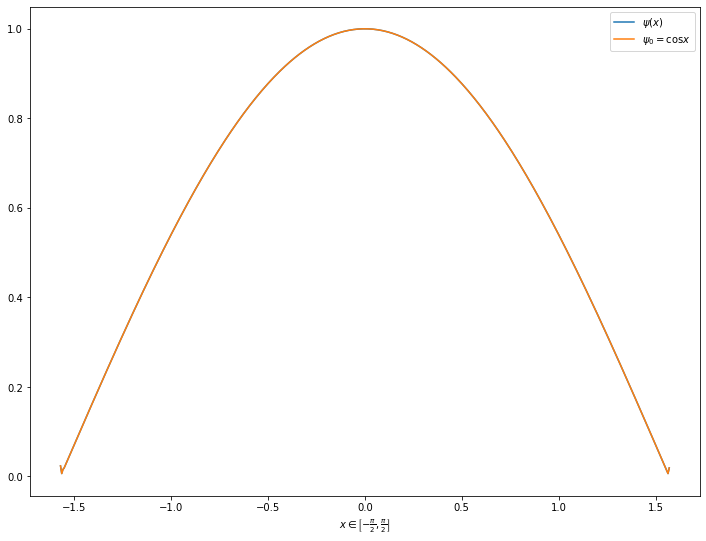

In [11]:
fig = plt.figure(figsize = (12, 9))


plt.plot(x, psi, label="$\\psi(x)$")
plt.plot(x, psi_0, label="$\\psi_0=\\cos{x}$")
plt.legend()

plt.xlabel("$x\\in\\left[-\\frac{\\pi}{2}, \\frac{\\pi}{2}\\right]$")

plt.show()